In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

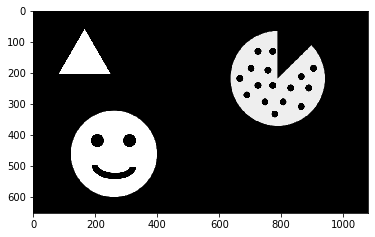

In [2]:
img = cv2.imread('../meta/internal_external.png',0)
plt.imshow(img,cmap='gray')

# Contours
**findContours**

function will return back contours in an image, and based on the RETR method called, you can get back external, internal, or both:

* cv2.RETR_EXTERNAL:Only extracts external contours
* cv2.RETR_CCOMP: Extracts both internal and external contours organized in a two-level hierarchy
* cv2.RETR_TREE: Extracts both internal and external contours organized in a  tree graph
* cv2.RETR_LIST: Extracts all contours without any internal/external relationship

In [3]:
contours, hierarchy = cv2.findContours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [4]:
hierarchy

array([[[ 4, -1,  1, -1],
        [ 2, -1, -1,  0],
        [ 3,  1, -1,  0],
        [-1,  2, -1,  0],
        [21,  0,  5, -1],
        [ 6, -1, -1,  4],
        [ 7,  5, -1,  4],
        [ 8,  6, -1,  4],
        [ 9,  7, -1,  4],
        [10,  8, -1,  4],
        [11,  9, -1,  4],
        [12, 10, -1,  4],
        [13, 11, -1,  4],
        [14, 12, -1,  4],
        [15, 13, -1,  4],
        [16, 14, -1,  4],
        [17, 15, -1,  4],
        [18, 16, -1,  4],
        [19, 17, -1,  4],
        [20, 18, -1,  4],
        [-1, 19, -1,  4],
        [-1,  4, -1, -1]]], dtype=int32)

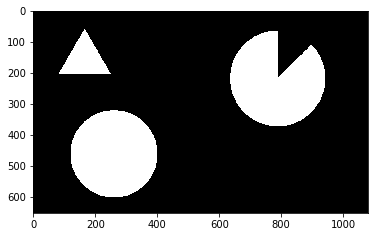

In [5]:
external_contours = np.zeros(img.shape)

for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(external_contours, contours, i, 255, -1)
plt.imshow(external_contours,cmap='gray')      

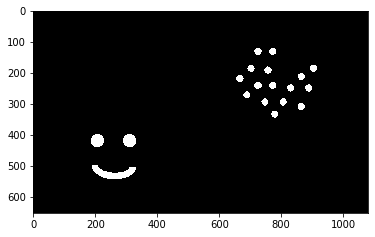

In [6]:
internal_contours = np.zeros(img.shape)

for i in range(len(contours)):
    if hierarchy[0][i][3] != -1:
        cv2.drawContours(internal_contours, contours, i, 255, -1)
plt.imshow(internal_contours,cmap='gray')        

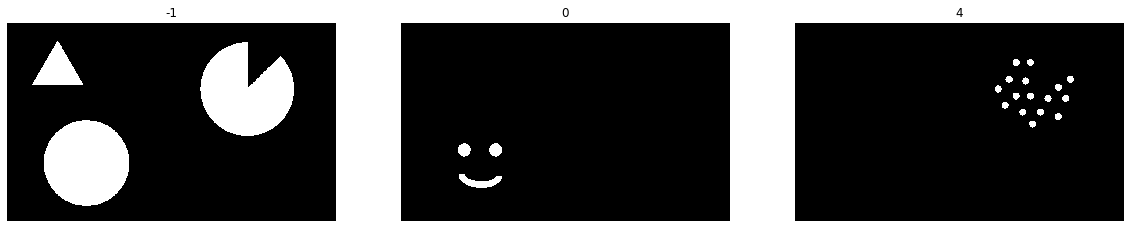

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(20, 12))
for idx, val in enumerate([-1, 0, 4]):
    img_contours = np.zeros(img.shape)

    for i in range(len(contours)):
        if hierarchy[0][i][3] == val:
            cv2.drawContours(img_contours, contours, i, 255, -1)
    ax[idx].imshow(img_contours,cmap='gray')  
    ax[idx].set_title(f"{val}")
    ax[idx].set_axis_off()